# Hi，this is Yuyang Ma from Modular.
# My ID is 22040677.

# I wasn't able to successfully do the project in the Example projects, so I chose a project that I had come across before and was related to this topic, a CNN-based project for 10 types of object recognition.
# For colorful images, it is more efficient to use CNN.
# In this project, I used the Cifar 10 dataset.

-

-

In [17]:
# 1. Import the data, import the Three Musketeers and Tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as t

In [18]:
# 2. Load the dataset cifar 10, for training and calibration data, receiving and splitting data
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [19]:
# 3. Split the data and take 5,000 as check data, same with x&y
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [20]:
# 4.Check the shape
x_valid.shape

(5000, 32, 32, 3)

In [21]:
x_train.shape

(45000, 32, 32, 3)

In [22]:
x_test.shape

(10000, 32, 32, 3)

In [23]:
y_test.shape

(10000, 1)

Text(0.5, 1.0, '3')

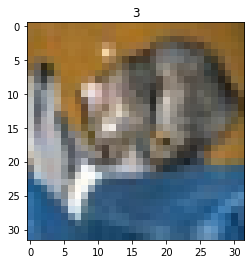

In [24]:
# 5.Draw one for checking, and add a title 
plt.imshow(x_test[0])
plt.title(y_test[0][0])

Explaination for what is 3 👆: In cifar 10 dataset, 3 responds for a cat picture.

-

In [25]:
# 6.Do a pre-processing of the data set
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

Explaination for answer: All integers from 0-250, if the input neural network would be too large

-

In [26]:
# 7.Normalize the data to narrow down the range, into a floating point shape, two-dimensional, reduced, receive
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)

-

👆 Has Completed pre-processing of data

-

👇  The essence of a convolutional neural network is that the features 
 in the image are extracted by convolutional operations and fed back into the neural network.

In [28]:
# 8. Defining Convolutional Neural Networks.
model = tf.keras.models.Sequential()
# 2 convolutions, one pooling, three repetitions, total 3 layers of operations
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
model.add(tf.keras.layers.Flatten())
# Fully connected
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

👆This is not an error it just tells me that it can and will use your CPU to gain extra speed

-

In [29]:
# 9. Configuring the network
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['acc'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [31]:
# 10. Training model
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 123s 87ms/step - loss: 1.8391 - acc: 0.3304 - val_loss: 1.6890 - val_acc: 0.4026
Epoch 2/10
1407/1407 [==============================] - 125s 89ms/step - loss: 1.3790 - acc: 0.5056 - val_loss: 2.0601 - val_acc: 0.3230
Epoch 3/10
1407/1407 [==============================] - 131s 93ms/step - loss: 1.1586 - acc: 0.5894 - val_loss: 1.1450 - val_acc: 0.6060
Epoch 4/10
1407/1407 [==============================] - 132s 94ms/step - loss: 1.0007 - acc: 0.6466 - val_loss: 0.9683 - val_acc: 0.6650
Epoch 5/10
1407/1407 [==============================] - 127s 90ms/step - loss: 0.8801 - acc: 0.6926 - val_loss: 1.0963 - val_acc: 0.6278
Epoch 6/10
1407/1407 [==============================] - 134s 95ms/step - loss: 0.7796 - acc: 0.7272 - val_loss: 1.4307 - val_acc: 0.5256
Epoch 7/10
1407/1407 [==============================] - 126s 89ms/step - loss: 0.6916 - acc: 0.7591 - val_loss: 0.8066 - val_acc: 0.7198
Epoch 8/10
1407/1407 [===================

Conclusion for 👆： 1. I think the accuracy rate is good, it got to 40% on the first calibration
                   2. Because it is 50,000 data repeatedly trained, the recognition rate will get higher and                          higher for things that are recognized; those that are not recognized, such as calibration 
                   data, will only be maintained to a certain level.
                   3.  👉👉👉👉👉👉👉👉Training data is 83.9% and calibration data is: 70.6%👈👈👈👈👈👈👈👈
                   4.I find that there is an upper limit to data algorithms and more is constantly being done to                      surpass the achievements of previous generations

In [32]:
# 11. Watch the data trend，draw a picture 
history.history

{'loss': [1.8391163349151611,
  1.3789772987365723,
  1.1586263179779053,
  1.0007387399673462,
  0.8801203966140747,
  0.7796480655670166,
  0.6916177272796631,
  0.6112117767333984,
  0.5340226292610168,
  0.4625929296016693],
 'acc': [0.33035555481910706,
  0.5056222081184387,
  0.5893555283546448,
  0.6465555429458618,
  0.6926444172859192,
  0.7271999716758728,
  0.7591333389282227,
  0.7871999740600586,
  0.8153111338615417,
  0.8385999798774719],
 'val_loss': [1.6889927387237549,
  2.060074806213379,
  1.1450202465057373,
  0.9682784080505371,
  1.0962764024734497,
  1.430709719657898,
  0.806577205657959,
  0.9417645335197449,
  0.8090245723724365,
  0.917961597442627],
 'val_acc': [0.4025999903678894,
  0.3230000138282776,
  0.6060000061988831,
  0.6650000214576721,
  0.6277999877929688,
  0.525600016117096,
  0.7197999954223633,
  0.6866000294685364,
  0.7253999710083008,
  0.7063999772071838]}

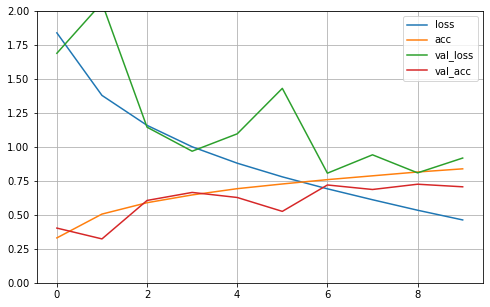

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 2)
plt.show()

Conclusion for 👆：1. The loss of training data is still quite high (blue line)
                  2. Loss of calibration data is volatile

-

In [34]:
# 12. Network optimization, output charts
# Add dropout to reduce overfitting.
model = tf.keras.models.Sequential()
# 2 convolutions, one pooling, three repetitions, total 3 layers of operations 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
model.add(tf.keras.layers.Flatten())
# Fully connected
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 139s 96ms/step - loss: 1.6782 - acc: 0.3967 - val_loss: 1.1706 - val_acc: 0.6088
Epoch 2/10
1407/1407 [==============================] - 135s 96ms/step - loss: 1.0682 - acc: 0.6212 - val_loss: 0.9352 - val_acc: 0.6878
Epoch 3/10
1407/1407 [==============================] - 126s 89ms/step - loss: 0.8692 - acc: 0.6951 - val_loss: 0.8474 - val_acc: 0.7360
Epoch 4/10
1407/1407 [==============================] - 128s 91ms/step - loss: 0.7356 - acc: 0.7445 - val_loss: 0.8303 - val_acc: 0.7474
Epoch 5/10
1407/1407 [==============================] - 129s 92ms/step - loss: 0.6425 - acc: 0.7775 - val_loss: 0.7994 - val_acc: 0.7784
Epoch 6/10
1407/1407 [==============================] - 134s 95ms/step - loss: 0.5660 - acc: 0.8019 - val_loss: 0.8447 - val_acc: 0.7798
Epoch 7/10
1407/1407 [==============================] - 130s 93ms/step - loss: 0.5049 - acc: 0.8214 - val_loss: 0.7947 - val_acc: 0.7886
Epoch 8/10
1407/1407 [===================

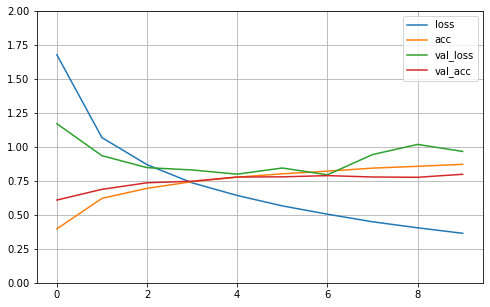

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 2)
plt.show()

Conclusion for 👆：Overfitting effect mitigated a littleOverfitting effect mitigated a little